In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
na_file_dirs =glob.glob('./aircraft_data/*.na')

In [3]:
%%time
# bring all of the data together into a DF each
df_list = []
for na_file in na_file_dirs:
    print("Start file:", na_file)
    data_list = []
    with open(na_file) as f:
        file_lines = f.readlines()
        variable_end_index = None
        for i in range(12,len(file_lines)):
            try:
                int(file_lines[i])
                variable_end_index = i
                break
            except:
                continue
        data_categories = file_lines[12:variable_end_index]
        header_line_count = int(file_lines[0].split(' ')[0])
        data_lines = file_lines[header_line_count:]
        for line in data_lines:
            separated_data = line.split()
            data_list.append(separated_data)
    df=pd.DataFrame(data_list)
    
    
    data_column_names = list(map(str.strip, data_categories))
    time_variable = ['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)']
    data_column_names = time_variable + data_column_names
    df.columns = data_column_names
    df['File_Name'] = na_file
    df_list.append(df)

Start file: ./aircraft_data/he20000828_clr.na
Start file: ./aircraft_data/he20000828_ds001.na
Start file: ./aircraft_data/he20000828_ds002.na
Start file: ./aircraft_data/he20000828_ds003.na
Start file: ./aircraft_data/he20000828_ds004.na
Start file: ./aircraft_data/he20000828_ds005.na
Start file: ./aircraft_data/he20000828_ds006.na
Start file: ./aircraft_data/he20000828_ds007.na
Start file: ./aircraft_data/he20000828_ds008.na
Start file: ./aircraft_data/he20000828_ds009.na
Start file: ./aircraft_data/he20000828_ds010.na
Start file: ./aircraft_data/he20000828_ds011.na
Start file: ./aircraft_data/he20000828_ds012.na
Start file: ./aircraft_data/he20000828_ds013.na
Start file: ./aircraft_data/he20000828_ds014.na
Start file: ./aircraft_data/he20000828_ds015.na
Start file: ./aircraft_data/he20000828_ds016.na
Start file: ./aircraft_data/he20000828_ds017.na
Start file: ./aircraft_data/he20000828_ds018.na
Start file: ./aircraft_data/he20000828_ds019.na
Start file: ./aircraft_data/he20000828_ds0

In [4]:
%%time
large_df = pd.concat(df_list)
large_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)'] = pd.to_numeric(large_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)'])
large_df = large_df.sort_values('time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)')
large_df = large_df.reset_index()
large_df

CPU times: user 12.2 s, sys: 6.87 s, total: 19 s
Wall time: 19 s


,index,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd),CORR UPPER CLR FLUX (W M-2 ),ERROR FLAG (CORR UPPER CLR FLUX ),CORR LOWER CLR FLUX (W M-2 ),ERROR FLAG (CORR LOWER CLR FLUX ),File_Name,data identifier,error flag (data identifier),air pressure(mb),...,NON-DEICED TRUE TEMP(DEG K ),ERROR FLAG (NON-DEICED TRUE TEMP),TOTAL WATER CONTENT (G KG-1 ),ERROR FLAG (TOTAL WATER CONTENT ),NORTHWARD WIND COMPT(M S-1 ),ERROR FLAG (NORTHWARD WIND COMPT),EASTWARD WIND COMPT (M S-1 ),ERROR FLAG (EASTWARD WIND COMPT ),VERTICAL WIND COMPT(M S-1 ),ERROR FLAG (VERTICAL WIND COMPT)
0,0,707.000000,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_ds030.na,2,00,852.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,708.000000,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_ds030.na,3,00,431.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,709.000000,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_ds030.na,3,00,492.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,710.000000,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_ds030.na,3,00,556.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,711.000000,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_ds030.na,3,00,627.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618372,2119741,58800.953125,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_tw1.na,NaN,NaN,NaN,...,NaN,NaN,999,3,NaN,NaN,NaN,NaN,NaN,NaN
4618373,2119742,58800.968750,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_tw1.na,NaN,NaN,NaN,...,NaN,NaN,999,3,NaN,NaN,NaN,NaN,NaN,NaN
4618374,1059871,58800.968750,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_tmp.na,NaN,NaN,NaN,...,306.689941,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618375,1059871,58800.968750,NaN,NaN,NaN,NaN,./aircraft_data/he20000828_wnd.na,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.32983398,0,-2.53417969,0,2.30419922,0


In [5]:
print(large_df.columns)

Index(['index', 'time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)',
       'CORR UPPER CLR FLUX (W M-2   )', 'ERROR FLAG (CORR UPPER CLR FLUX )',
       'CORR LOWER CLR FLUX (W M-2   )', 'ERROR FLAG (CORR LOWER CLR FLUX )',
       'File_Name', 'data identifier', 'error flag   (data identifier)',
       'air pressure(mb)', 'error flag   (air pressure)',
       'air temperature(degC)', 'error flag   (air temperature)',
       'relative humidity(%)', 'error flag   (relative humidity)',
       'wind direction(deg)', 'error flag   (wind direction)',
       'wind speed(m/s)', 'wind error(m/s)', 'vertical velocity of sonde(m/s)',
       'error flag   (vertical velocity of sonde)', 'gps longitude(deg)',
       'error flag   (gps longitude)', 'GPS latitude(deg)',
       'error flag   (GPS latitude)', 'Geopotential altitude(m)',
       'error flag   (Geopotential altitude)', 'no. of satellites in GPS wind',
       'error flag   (no. of satellites in GPS wind)',
       'no. of satelli

In [6]:
position_cols = [
    'time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)', 
    'gps longitude(deg)', 'error flag   (gps longitude)', 
    'GPS latitude(deg)', 'error flag   (GPS latitude)', 
    'Geopotential altitude(m)', 'error flag   (Geopotential altitude)'
]
plane_pos = large_df[position_cols]
plane_pos

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd),gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude)
0,707.000000,999.00000,3,99.00000,3,1036.12,0
1,708.000000,1.77439,0,17.00160,0,6597.63,0
2,709.000000,1.77359,0,17.00256,0,5585.79,0
3,710.000000,1.77101,0,17.00438,0,4624.91,0
4,711.000000,1.76963,0,17.00883,0,3666.93,0
...,...,...,...,...,...,...,...
4618372,58800.953125,NaN,NaN,NaN,NaN,NaN,NaN
4618373,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN
4618374,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN
4618375,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# set the bad data to NaN
error_flag_var_boolean = plane_pos.columns.str.contains('error flag')
df_error_flags = plane_pos.loc[:, error_flag_var_boolean]
good_data_mask = ((df_error_flags=='2') | (df_error_flags=='3'))
flag_to_data = np.concatenate((error_flag_var_boolean[1:], [False]))
df_data = plane_pos.loc[:, flag_to_data]
df_data.apply(pd.to_numeric)
good_data_mask.columns = df_data.columns
nan_df = df_data.mask(good_data_mask, other=np.NaN)
plane_pos.loc[:,nan_df.columns] = nan_df
plane_pos

/var/tmp/ipykernel_29377/2349332696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_pos.loc[:,nan_df.columns] = nan_df


,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd),gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude)
0,707.000000,NaN,3,NaN,3,1036.12,0
1,708.000000,1.77439,0,17.00160,0,6597.63,0
2,709.000000,1.77359,0,17.00256,0,5585.79,0
3,710.000000,1.77101,0,17.00438,0,4624.91,0
4,711.000000,1.76963,0,17.00883,0,3666.93,0
...,...,...,...,...,...,...,...
4618372,58800.953125,NaN,NaN,NaN,NaN,NaN,NaN
4618373,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN
4618374,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN
4618375,58800.968750,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# if all of the values are NaN, drop the data
values_on_a_col = plane_pos['Geopotential altitude(m)'].notna() | plane_pos['GPS latitude(deg)'].notna() | plane_pos['gps longitude(deg)'].notna()
plane_pos = plane_pos[values_on_a_col]
plane_pos

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd),gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude)
0,707.0,NaN,3,NaN,3,1036.12,0
1,708.0,1.77439,0,17.00160,0,6597.63,0
2,709.0,1.77359,0,17.00256,0,5585.79,0
3,710.0,1.77101,0,17.00438,0,4624.91,0
4,711.0,1.76963,0,17.00883,0,3666.93,0
...,...,...,...,...,...,...,...
2977873,46913.5,NaN,3,NaN,3,-75.16,0
2977948,46914.0,NaN,3,NaN,3,-83.03,0
2978017,46914.5,NaN,3,NaN,3,-90.95,0
2978080,46915.0,NaN,3,NaN,3,-97.12,0


In [9]:
# have a look to see if data is feasibly plotted where all three values exist
plane_pos_hard_constraint = plane_pos.dropna()
plane_pos_hard_constraint

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd),gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude)
1,708.0,1.77439,0,17.00160,0,6597.63,0
2,709.0,1.77359,0,17.00256,0,5585.79,0
3,710.0,1.77101,0,17.00438,0,4624.91,0
4,711.0,1.76963,0,17.00883,0,3666.93,0
6,713.0,1.76453,0,17.01333,0,1787.45,0
...,...,...,...,...,...,...,...
2972341,46874.0,1.65115,0,12.00046,0,498.33,0
2972415,46874.5,1.65121,0,12.00045,0,491.48,0
2972485,46875.0,1.65126,0,12.00045,0,485.46,0
2972902,46878.0,1.65129,0,12.00050,0,445.07,0


10000 values, Nice!

In [10]:
lon_vals = list(map(float, plane_pos_hard_constraint['gps longitude(deg)']))
lat_vals = list(map(float, plane_pos_hard_constraint['GPS latitude(deg)']))
alt_vals = list(map(float, plane_pos_hard_constraint['Geopotential altitude(m)']))

In [11]:
print(lon_vals[0:3], lat_vals[0:3], alt_vals[0:3])

[1.77439, 1.77359, 1.77101] [17.0016, 17.00256, 17.00438] [6597.63, 5585.79, 4624.91]


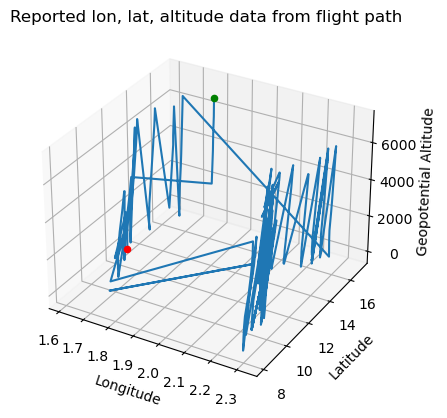

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(lon_vals, lat_vals, alt_vals)
ax.scatter(lon_vals[0], lat_vals[0], alt_vals[0], c='Green', label='Start')
ax.scatter(lon_vals[-1], lat_vals[-1], alt_vals[-1], c='Red', label='Stop')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Geopotential Altitude')
plt.title('Reported lon, lat, altitude data from flight path')

plt.show()

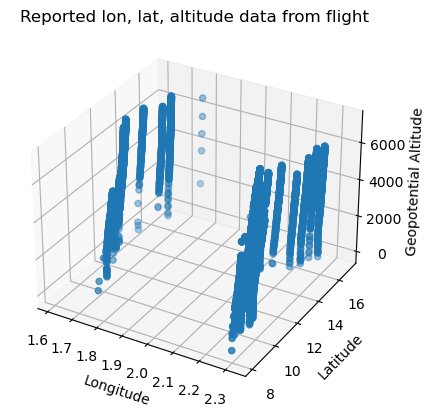

In [13]:
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(lon_vals, lat_vals, alt_vals)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Geopotential Altitude')
plt.title('Reported lon, lat, altitude data from flight')
plt.show()

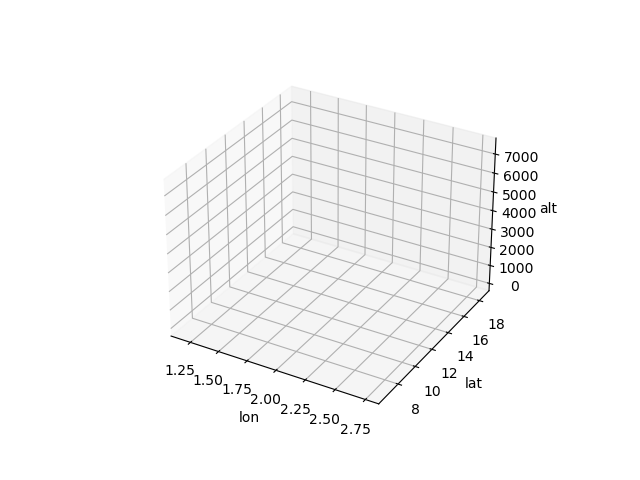

In [14]:
# %matplotlib widget
# import matplotlib.animation as animation
# # Enable interactive plot


# lon_dat = []
# lat_dat = []
# alt_dat = []

# def update_lines(animation_step_int, plot_line, data):
#     lon_dat.append(data[0])
#     lat_dat.append(data[1])
#     alt_dat.append(data[2])
#     line.set_data(lon_dat, lat_dat, alt_dat)
#     return line

# # Attaching 3D axis to the figure
# fig = plt.figure()
# ax = fig.add_subplot(projection="3d")

# # Create lines initially without data
# line = ax.plot([], [], [])[0]

# # Setting the axes properties
# ax.set(xlim3d=((np.min(lon_vals)-0.5), (np.max(lon_vals)+0.5)), xlabel='lon')
# ax.set(ylim3d=((np.min(lat_vals)-2), (np.max(lat_vals)+2)), ylabel='lat')
# ax.set(zlim3d=((np.min(alt_vals)-100), (np.max(alt_vals)+500)), zlabel='alt')

       
# animation_len = len(lon_vals)       
# data = [lon_vals, lat_vals, alt_vals]
# # Creating the Animation object
# anim = animation.FuncAnimation(
#     fig, update_lines, animation_len, fargs=(line, data), interval=100
# )

# plt.show()